<img src="../ancillarydata/logos/climbeco_course_logo.png" width="1000" align="left"/>

<a id="intro"></a>

<br>
<br>


# <font color=#800000> Exercise 4</font>  
## _Estimating national budgets_
<br>

This exercise package is focusing on how to use country masks on modelling results (i.e. vegetation modelling, inverse modelling) to estimate national budgets. You will use modelling results with different spatial resolutions together with country masks of different resolution and/or country coverage (i.e. incl. Exclusive Economic Zones - EEZ or not incl. EEZ).

<b>INPUT DATA</b>

- EDGAR annual total emissions (in 0.1 and 0.5 deg resolutions) --- > anthropogenic emissions
- LUMIA output (0.5 deg resolution) --- > biospheric fluxes (annual totals need to be computed)
- Country masks

    - EEZ (0.1 deg grid resolution)
    - EEZ (0.5 deg grid resolution)
    - No EEZ (0.1 deg grid resolution)
    - No EEZ (0.5 deg grid resolution)

More infos about marine regions, borders etc: [marine regions, interactive map](http://www.marineregions.org/eezsearch.php) , [wiki: exclusive economic zone](https://en.wikipedia.org/wiki/Exclusive_economic_zone)

More information about the EDGAR fossil fuel emission can be found [HERE](https://edgar.jrc.ec.europa.eu/overview.php?v=booklet2019#)

The exercise includes the following tasks:

1. Visually inspect an [interactive map](#cmask_map) presenting country masks (EEZ & No EEZ) in different resolutions (0.1 degree or 0.5 degree).
2. Select 2 countries (e.g. "Sweden" and "Switzerland", one country with coastal borders and one without). Create a [plot comparing EDGAR-data with different combinations of country masks](#edgar_anthrop_emis) (i.e. EEZ or No EEZ) and EDGAR grid-resolutions (0.1 deg or 0.5 deg) for every country. Do you see any differences?
3. Create a [plot showing the differences in estimated national budgets](#national_budgets) for 2 countries with EDGAR-data and LUMIA-data of 0.5 deg grid resolution with and without EEZ country masks.

In [1]:
# imort some helper functions and libraries
%run ./tools.ipynb

<IPython.core.display.Javascript object>

Loading BokehJS ...

<a id="cmask_map"></a>

## <font color='#80000'>Task 1</font> - Country mask map
In this task you will visually inspect differences between different country masks (including or excluding EEZ) and different country mask resolutions. Use the form below to select a country, a type of country mask an a grid resolution for the country mask. Click on the ```Run```-button to view the results of your selection.

Use the interactive map to zoom in to the country boarders and activate the ```Hover```-tool from the toolbox located on the right side of your map. Hover over the country boundaries to view the how big part of the cell is included in the country mask.

In [2]:
#Call function to display widgets:
cmask_widget_form()

Output()

<div style="text-align: right">    <a href="#intro">Back to top</a> </div><a id="edgar_anthrop_emis"></a>

## <font color='#800000'>Task 2</font> - Annual total anthropogenic emissions per country (EDGAR)
<table><tr><td width='300'>
<p>Calculate the emission for two countries and create a plot to compare the results.
For each country you should use two grid resolutions (0.1 and 0.5) and two "masks", 
the EEZ (Exclusive Economic Zone) and the territorial waters one. Below are two cells, in the first one you should make the calculations. If you keep the variable names, the second cell will produce a plot to compare the two countries.</p></td><td><img src="../ancillarydata/images/exercise4/task2.png"></td></tr></table>

Fossil fuel emisions from [EDGAR](https://edgar.jrc.ec.europa.eu/overview.php?v=CO2andGHG1970-2016#) (Emissions Database for Global Atmospheric Research) are available as annual emissions on a 0.1° x 0.1° grid. But in the inversions the emission data are regridded to the model-specific grid, e.g. on a 0.5° x 0.5° grid in LUMIA (used in exercise 2).

### Read EDGAR emission data

In [3]:
# read EDGAR anthropogenic emissions on 0.5 degree x 0.5 degree grid
lon_edgar_05, lat_edgar_05, emis_edgar_05, edgar_units_05 = read_edgar(path_edgar,0.5)
xx_edgar_05,yy_edgar_05 = get_mesh(lon_edgar_05,lat_edgar_05)

# read EDGAR anthropogenic emissions on 0.1 degree x 0.1 degree grid
lon_edgar_01, lat_edgar_01, emis_edgar_01, edgar_units_01 = read_edgar(path_edgar,0.1)
xx_edgar_01,yy_edgar_01 = get_mesh(lon_edgar_01,lat_edgar_01)

edgar_units_01, edgar_units_05

('kg m-2 s-1', 'kg m-2 s-1')

Fossil fuel emisions from EDGAR are given in kg CO2 / m2 / s. In LUMIA we have gC / m2 / d <br>
We will use the LUMIA unit for our comparison, hence you need to convert the EDGAR emissions. Don't forget to also convert carbon dioxide to carbon (https://ecometrica.com/white-papers/greenhouse-gases-co2-co2e-and-carbon-what-do-all-these-terms-mean)
> kg (to) g: * 1000<br>
> CO2 (to) C: * 0.27  or * (12 / 44)<br>
> s (to) d: * 86400 (24 * 60 * 60)<br>

Be aware of how you calculate numbers. Floating point conversions, can make a difference. Which one is better? The unit is now Carbon / m2 / day. If you think of how many m2 we have and the emissions for a year....

In [4]:
convert1 = 1000 * 86400 * (12/44)
convert2 = 1000 * 86400 * 0.27
print([convert1, convert2])
print('edgar01 emission sum in gC / m2 / d: ', emis_edgar_01.sum()* convert1)
print('edgar01 emission sum in gC / m2 / d: ', emis_edgar_01.sum()* convert2)

[23563636.363636363, 23328000.0]
edgar01 emission sum in gC / m2 / d:  52911.40445254066
edgar01 emission sum in gC / m2 / d:  52382.29040801525


### Plot EDGAR emission data

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


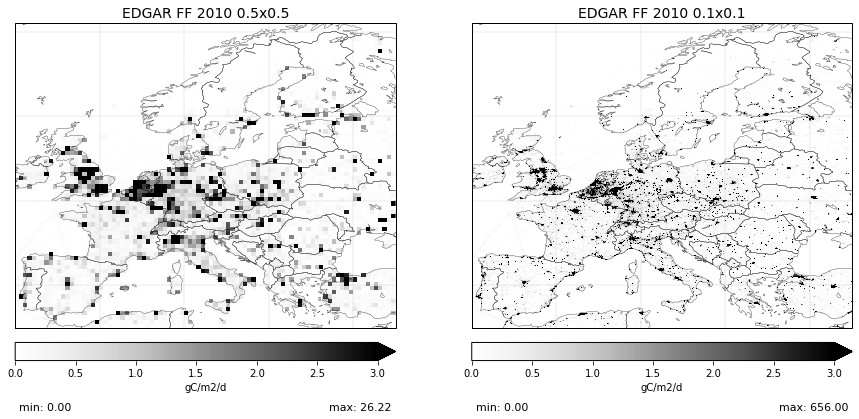

In [5]:
fig = plt.figure(figsize=(15,20))
rows = 1
cols = 2
xx=xx_edgar_05
yy=yy_edgar_05
title='EDGAR FF 2010 0.5x0.5'
zz=emis_edgar_05[:,:] * convert1  #convert to gC/m2/d
plot_map(fig,xx,yy,zz,rows,cols,1,title,units='gC/m2/d',vmin='0', vmax='3',cb_name='Greys', extend='max')

xx=xx_edgar_01
yy=yy_edgar_01
title='EDGAR FF 2010 0.1x0.1'
zz=emis_edgar_01[:,:] * convert1  #convert to gC/m2/d
plot_map(fig,xx,yy,zz,rows,cols,2,title,units='gC/m2/d',vmin='0', vmax='3',cb_name='Greys',extend='max')

plt.show()
plt.close()

Now you have ceated a pretty plot, but what is the meaning of the colorbar and why did we choose min/max values? The minium of zero(0) is because a negativ fossil fuel emission is not possible. The maximum value is significantly different between grid 0.1 and grid 0.5, so why did we choose vmax=3? Have a look at the data itself and the distribution. Create a histogram of the data and you will see that most of the data points are between 0 and 3. Basically the colorbar in the plot means, that values greater or equal 3 have the same color (black in our example). If you would like play around with colormaps, here a few more: 
'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds'.<br>
The first three lines will print the values of the distribution of the data. The plt commands, will produce a histogram plot.
> hist, bin_edges = np.histogram(zz,100)<br>
> print(hist)<br>
> print(bin_edges)<br>
> plt.figure(figsize=[5,4])<br>
> plt.bar(bin_edges[:-1], hist, width = 5)<br>
> plt.xlim(min(bin_edges),20)<br>
> plt.grid(axis='y', alpha=0.75)<br>
> plt.xlabel('Value',fontsize=15)<br>
> plt.ylabel('Frequency',fontsize=15)<br>
> plt.xticks(fontsize=15)<br>
> plt.yticks(fontsize=15)<br>
> plt.ylabel('Frequency',fontsize=15)<br>
> plt.title('Normal Distribution Histogram',fontsize=15)<br>
> plt.show()



In [6]:
# look at the distribution


### Read country masks 
*To look at the differences between grid resolution in a visual fashion, go to the map visualization at the top of the notebook.*
<div style="text-align: right"><a href="#cmask_map">Go to map</a></div><a id="country_mask"></a>

In [7]:
# read country masks
masks05 = ['eurocomCountryMask_0.5x0.5_noship.nc','eurocomCountryMaskEEZ_0.5x0.5_noship.nc']
lonMask05, latMask05, countryMask05, countryCode05, countryName05  = read_country_masks(path_masks+masks05[0])
lonMask05EEZ, latMask05EEZ, countryMask05EEZ, countryCode05EEZ, countryName05EEZ  = read_country_masks(path_masks+masks05[1])

masks01 = ['eurocomCountryMask_0.1x0.1_noship.nc','eurocomCountryMaskEEZ_0.1x0.1_noship.nc']
lonMask01, latMask01, countryMask01, countryCode01, countryName01  = read_country_masks(path_masks+masks01[0])
lonMask01EEZ, latMask01EEZ, countryMask01EEZ, countryCode01EEZ, countryName01EEZ  = read_country_masks(path_masks+masks01[1])

# for computation of country emissions we need to convert from per m2 to per gridcell
# read in grid cell area
cell_lon_05, cell_lat_05, cellarea_05 = read_cellarea('cellarea_0.5x0.5.nc')
cell_lon_01, cell_lat_01, cellarea_01 = read_cellarea('cellarea_0.1x0.1.nc')


In [8]:
# remember the convert factor from above
# Define the conversion factors to get to Gg CO2 / year and Gg C / year
# the original dataset is in kg CO2 / m2 / s
# the arec (m2 to grid area we have taken care of, it is stored in cellarea....nc)
# just convert the "physical units and time"

unit1 = 'Gg CO2 / yr'
unit1_factor = 365 * 24 * 60 * 60 * 1e-6

unit2 = 'Gg C / yr'
unit2_factor = unit1_factor * (44/12)


In [9]:
# loop through all the countries and get the emissions
# you should end up with 4 pandas dataframes
# grid01 , grid01 EEZ, grid 05, grid 05 EEZ

df_grid01 = []
df_grid01EEZ = []
for n in range(np.size(countryCode01)):    
    em = (emis_edgar_01 * cellarea_01 * countryMask01[n,:,:]).sum()    
    em1 = em * unit1_factor  # unit1
    em2 = em * unit2_factor  # unit2    
    df_grid01.append([n, countryCode01[n], countryName01[n], em1, em2])
    
    em = (emis_edgar_01 * cellarea_01 * countryMask01EEZ[n,:,:]).sum()
    em1 = em * unit1_factor  # unit1
    em2 = em * unit2_factor  # unit2    
    df_grid01EEZ.append([n, countryCode01EEZ[n], countryName01EEZ[n], em1, em2])

df_grid05 = []    
df_grid05EEZ = []    
for n in range(np.size(countryCode05)):    
    em = (emis_edgar_05 * cellarea_05 * countryMask05[n,:,:]).sum()
    em1 = em * unit1_factor  # unit1
    em2 = em * unit2_factor  # unit2    
    df_grid05.append([n, countryCode05[n], countryName05[n], em1, em2])
    
    em = (emis_edgar_05 * cellarea_05 * countryMask05EEZ[n,:,:]).sum()
    em1 = em * unit1_factor  # unit1
    em2 = em * unit2_factor  # unit2    
    df_grid05EEZ.append([n, countryCode05EEZ[n], countryName05EEZ[n], em1, em2])
    
colnames = ['index', 'c_code', 'c_name',unit1, unit2]
df_grid01 = pd.DataFrame(df_grid01, columns=colnames)
df_grid01EEZ = pd.DataFrame(df_grid01EEZ, columns=colnames)
df_grid05 = pd.DataFrame(df_grid05, columns=colnames)
df_grid05EEZ = pd.DataFrame(df_grid05EEZ, columns=colnames)

### Tables of emissions per country
#### resolution 0.1° x 0.1°

In [10]:
# now we should have four pandas data frames for 0.1 and 0.5 grid and EEZ with all countries
# and their respective emissions. Look at the data. Change index to [1:] to see all entries.
multi_table([df_grid01[1:5],df_grid01EEZ[1:5]], ['Grid 01','Grid 01 EEZ'])

#### resolution 0.5° x 0.5°

In [11]:
multi_table([df_grid05[1:5],df_grid05EEZ[1:5]], ['Grid 05', 'Grid 05 EEZ'])

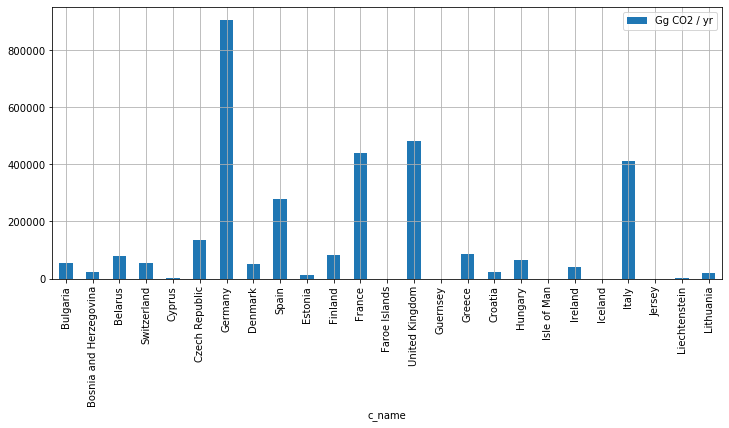

In [12]:
# or you can create plot with countries (index 5 to 30)
ax = df_grid01[5:30].plot.bar(x='c_name', y =unit1,figsize=(12,5), grid=True)

### Select country
To find the c_code for the country you are looking for, just print all entries of the data frames above:
```python
multi_table([df_grid05[1:],df_grid05EEZ[1:]], ['Grid 05', 'Grid 05 EEZ'])
```

In [24]:
multi_table([df_grid05[1:],df_grid05EEZ[1:]], ['Grid 05', 'Grid 05 EEZ'])

In [23]:
#extract emission for a country.
# the helper function returns a list of emissions 
de = getEmissions([df_grid01,df_grid01EEZ, df_grid05,df_grid05EEZ],'DEU', unit1)
de, unit1

([907136.0539319307, 914707.169344761, 902367.1947750755, 915970.0935256925],
 'Gg CO2 / yr')

You can change the countries you want compare by changing the country codes in the following python command.
```python
#define two countries to compare
countries = ['SWE', 'CHE']
```

In [14]:
# this part (cell) you need to compute the "real" data
# and adjust the names and labels
# Select two country codes from the above list.
# Keep the variable names, or adjust the plot function below
# except of the countries and unit

#define two countries to compare
countries = ['SWE', 'CHE']

emission_data = [df_grid01,df_grid01EEZ, df_grid05,df_grid05EEZ]
c1 = getEmissions(emission_data,countries[0], unit1)
c2 = getEmissions(emission_data,countries[1], unit1)

grid_resolution=['Grid 0.1','Grid 0.5']
country_mask = ['No EEZ','EEZ']

ylabel_1 = 'unit of emission'
ylabel_1 = unit1

# edgar emissions country_grid[No EEZ , EEZ]
c1_edgar_grid1 = np.array([c1[0],c1[1]])
c1_edgar_grid2 = np.array([c1[2],c1[3]])

c2_edgar_grid1 = np.array([c2[0],c2[1]])
c2_edgar_grid2 = np.array([c2[2],c2[3]])

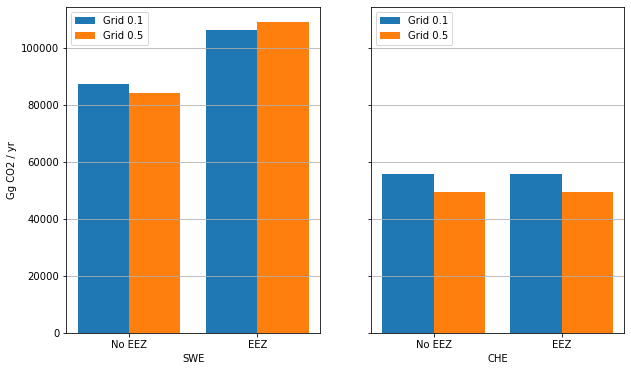

In [15]:
# compare edgar country masks for different grid resolution
# if you kept the variable names you don't need to change
#anything in this cell. just execute to create the plot
#-----------------------------------------------------------
# create plot
fig1,(ax1,ax2) = plt.subplots(1,2,sharey=True)
fig1.set_size_inches(10,6)
x = np.arange(len(grid_resolution))
barwidth = 0.4
# create the "left" subplot and add edgar numbers
# to compare grid and country mask
ax1.bar(x-barwidth/2,c1_edgar_grid1,barwidth, label=grid_resolution[0])
ax1.bar(x+barwidth/2,c1_edgar_grid2,barwidth, label=grid_resolution[1])

# add annotation
ax1.set_xticks(x)
ax1.set_xticklabels(country_mask)
ax1.grid(axis='y')
ax1.legend(loc='upper left')
ax1.set_xlabel(countries[0])
ax1.set_ylabel(ylabel_1)

# the next country..
ax2.bar(x-barwidth/2,c2_edgar_grid1,barwidth, label=grid_resolution[0])
ax2.bar(x+barwidth/2,c2_edgar_grid2,barwidth, label=grid_resolution[1])

# add annotation
ax2.set_xticks(x)
ax2.set_xticklabels(country_mask)
ax2.grid(axis='y')
ax2.legend(loc='upper left')
ax2.set_xlabel(countries[1])

plt.show()

<div style="text-align: right"> <a href="#intro">Back to top</a></div><a id="national_budgets"></a>

## <font color='#800000'>Task 3</font> - Estimated national budgets from different models & country masks
<table><tr><td width='300'>
<p>We will reuse the emission from above, but now we will add the "lumia" biosphere emmision, to discuss the ratio of antropogenic and biosphere emission, and impact of country mask selection. The goal here is to create a plot for two countries, show "edgar" "lumia" and and the corresponding total amount of emission for each country and mask (NoEEZ, EEZ). We do have only 0.5 grid values for Lumia, so we do not compare the impact of grid resolution this time.</p></td><td><img src="../ancillarydata/images/exercise4/task3.png"></td></tr></table>

### Read LUMIA NEE

In [16]:
# LUMIA inversion using core sites
filename='co2flux_monthly_lumia_core_2009_2018.nc'
lon_LUMIA,lat_LUMIA,time_LUMIA,bio_prior_LUMIA_map,bio_poste_LUMIA_map,oce_LUMIA_map,ff_LUMIA_map,cell_area_LUMIA_map,flux_units_LUMIA,comment = read_EUROCOM_drought_fluxmap(path_lumia+filename)
xx_LUMIA,yy_LUMIA = get_mesh(lon_LUMIA,lat_LUMIA)

flux_units_LUMIA

'kgC/m2/h'

### Plot LUMIA NEE

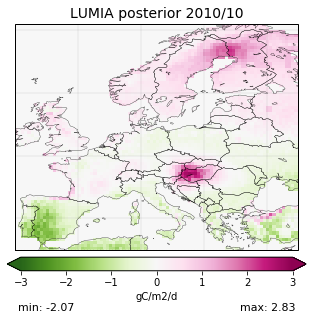

In [17]:
# NEE
# fluxes are given in kgC/m2/h in the netcdf files
# convert fluxes to gC / m2 / d
fact = 1000*24
units_bio='gC/m2/d'

year = 2010
month = 10
ind_LUMIA=[n for n in range(len(time_LUMIA)) if ((time_LUMIA[n].year==year)& (time_LUMIA[n].month==month))][0]

#LUMIA posterior
title ='LUMIA posterior '+ str(year) + '/' + str(month)
NEE = bio_poste_LUMIA_map[ind_LUMIA,:,:] * fact

fig = plt.figure(figsize=(12,10))
plot_map(fig,xx_LUMIA , yy_LUMIA , NEE, 1,1,1, title,units=units_bio)


### Apply country masks on LUMIA to compute national total biosphere fluxes 

In [25]:
# Calculate the emissions per country as we have done before with EDGAR emissions.
# The country masks and cell area is still available from above.

#first we need select the complete year (in the plot above you have select one month...)
year = 2010
ind_LUMIA=[n for n in range(len(time_LUMIA)) if (time_LUMIA[n].year==year)]
#and compute the annual mean emissions
NEE = np.mean(bio_poste_LUMIA_map[ind_LUMIA,:,:],axis=0) * fact

df_lumia05 = []    
df_lumia05EEZ = []    
for n in range(np.size(countryCode05)):    
    em = (NEE * cell_area_LUMIA_map * countryMask05[n,:,:]).sum()
    em1 = em / 1e+6    
    df_lumia05.append([n, countryCode05[n], countryName05[n], em1])
    
    em = (NEE * cell_area_LUMIA_map * countryMask05EEZ[n,:,:]).sum()
    em1 = em / 1e+6     
    df_lumia05EEZ.append([n, countryCode05EEZ[n], countryName05EEZ[n], em1])

colnames = ['index', 'c_code', 'c_name',unit1]
df_lumia05 = pd.DataFrame(df_lumia05)
df_lumia05.columns = colnames
df_lumia05EEZ = pd.DataFrame(df_lumia05EEZ)
df_lumia05EEZ.columns = colnames    
    

#### Table with biosphere fluxes for all countries

In [26]:
multi_table([df_lumia05[1:],df_lumia05EEZ[1:]], ['Lumia 05','Lumia EEZ'])

### Compute national budgets 

In [27]:
# For Lumia, we only have values for gridresolution 0.5
# create two array's (one for each country) containing
# the emission for mask1 (NoEEZ) and mask2 (EEZ)
# country0_lumia = np.array([val for mask1, val for mask2])
lumia_emissions = [df_lumia05,df_lumia05EEZ]

c1_lumia = getEmissions(lumia_emissions,countries[0],unit1)
c2_lumia = getEmissions(lumia_emissions,countries[1],unit1)

In [28]:
# country total emission
# sum up the fossil fuel and biosphere emissions
c1_total = c1_edgar_grid2 + c1_lumia
c2_total = c2_edgar_grid2 + c2_lumia

### Plot national budgets

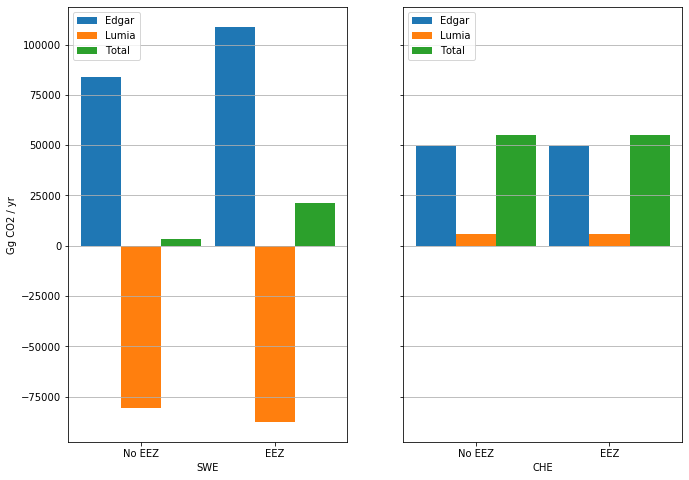

In [30]:
#-----------------------------------------------------------
# compare two countries for country mask,
#Fossil Fuel, Biosphere emission and Total Carbon Budget
#-----------------------------------------------------------

unit = unit1

# create plot
fig2,(ax1,ax2) = plt.subplots(1,2,sharey=True)
fig2.set_size_inches(11,8)

x = np.arange(len(grid_resolution))
barwidth = 0.3
# add edgar
ax1.bar(x-barwidth,c1_edgar_grid2,barwidth, label="Edgar")
ax1.bar(x, c1_lumia,barwidth, label="Lumia")
ax1.bar(x+barwidth,c1_total,barwidth, label='Total')

# add annotation
ax1.set_xticks(x)
ax1.set_xticklabels(country_mask)
ax1.grid(axis='y')
ax1.legend(loc='upper left')
ax1.set_xlabel(countries[0])
ax1.set_ylabel(unit1)

# add lumia
ax2.bar(x-barwidth,c2_edgar_grid2,barwidth, label="Edgar")
ax2.bar(x, c2_lumia,barwidth, label="Lumia")
ax2.bar(x+barwidth,c2_total,barwidth, label='Total')

# add annotation
ax2.set_xticks(x)
ax2.set_xticklabels(country_mask)
ax2.grid(axis='y')
ax2.legend(loc='upper left')
ax2.set_xlabel(countries[1])

plt.show()


<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>

## <font color='blue'>Questions: </font>
1. What is the motivation of including /excluding the EEZ zones? What is the effect of including/excluding the EEZ zones in a practical example? Are there any political/economical problems of including the EEZ zones in the national budget?

2. What type of effect does the spatial resolution on the grid have on computation on the national budgets? What is the main problem of using a coarse grid? Could this problem be solved by using partial values for the countries in the land mask? Please, provide some test result using the Jupyter notebook.

3. (If time permits) A challenge is that the inverse model deals the earth as a sphere while the geographic data (including the national boundary data) are based on an ellipsoidal earth model. What error could be introduced here? Which strategies could be used to reduce the effect of the flattening of the earth? (No easy answer on this…). Test the effect of using a spherical or ellipsoidal earth model in the step going from grid values to a national budget using two countries, e.g. Sweden and Italy. How does the geographic position of the country affect the difference emerging from the different earth models?

<br>
<br>
<br>
<br>
<img src="../ancillarydata/logos/climbeco_contributors_logo.png" width="1000" align="left"/>
